In [1]:
import imageio as io

In [2]:
way1 = io.imread("a.tif")

C:\Users\me\Anaconda3\lib\site-packages\tifffile.py:7685: UserWarning: No module named '_tifffile'
  Functionality might be degraded or be slow.

  warnings.warn('%s%s' % (e, warn))


In [4]:
way1.shape, way1.dtype

((2000, 4000), dtype('uint16'))

In [5]:
from skimage.io import imread

In [6]:
way2 = imread("a.tif")

In [7]:
way2.shape, way2.dtype

((2000, 4000), dtype('uint16'))

In [8]:
import matplotlib.pyplot as plt

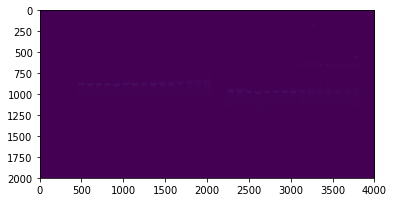

In [9]:
plt.imshow(way2)

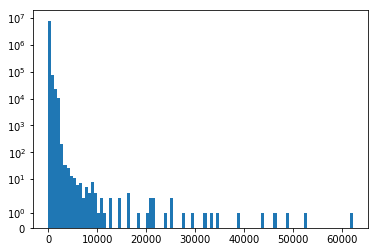

In [13]:
plt.hist(way2.ravel(), bins=100);
plt.yscale("symlog")

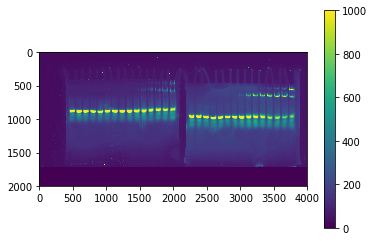

In [17]:
plt.imshow(way2, vmax=1000)
plt.colorbar()

In [26]:
from skimage.feature import canny

In [31]:
im = way2[:, 400:2100]

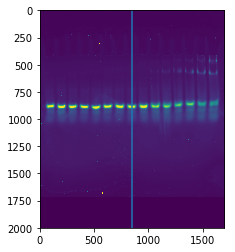

In [41]:
plt.imshow(im,vmax=2000)
plt.axvline(850)

In [47]:
import numpy as np

In [49]:
s.dtype

dtype('uint32')

(0, 250)

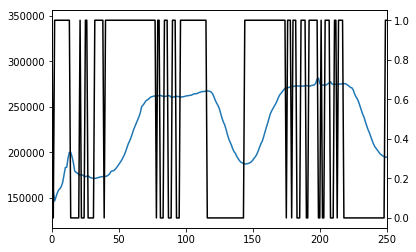

In [54]:
s = im.sum(0)
first_derivative = np.diff(s.astype(np.float32))
ax = plt.subplot(111)
plt.plot(s)
ax.twinx()
plt.plot(first_derivative > 0, color='k')
plt.xlim([0, 250])

In [55]:
from scipy.signal import find_peaks

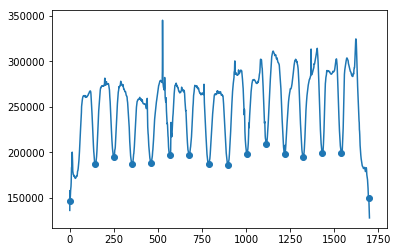

In [68]:
peaks = find_peaks(-s, distance=100)[0]

plt.plot(s)
plt.scatter(peaks, s[peaks])

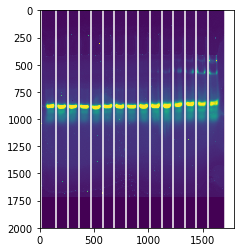

In [73]:
plt.imshow(im, vmax=1000)

for peak in peaks:
    plt.axvline(peak+10, color="w")

In [82]:
from ipywidgets import interact

In [81]:
from scipy.signal import butter, filtfilt

In [90]:
@interact
def filter_signal(order=3, cutoff_frequency:(0, 0.1, 0.001)=.01):
    b, a = butter(order, cutoff_frequency)
    signal = filtfilt(b, a, intensity_diagram)
    
    plt.plot(signal)

interactive(children=(IntSlider(value=3, description='order', max=9, min=-3), FloatSlider(value=0.01, description='cutoff_frequency', max=0.1, step=0.001), Output()), _dom_classes=('widget-interact',))

2 144
144 249
249 355
355 460
460 570
570 676
676 788
788 897
897 1004
1004 1115
1115 1218
1218 1323
1323 1432
1432 1540
1540 1694


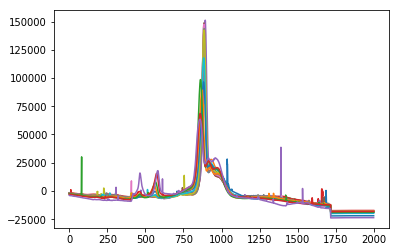

In [100]:
line = 0
b, a = butter(3, 0.001)

for section_start, section_end in zip(peaks, peaks[1:]):
    print(section_start, section_end)
    
    intensity_diagram = im[:, section_start:section_end].sum(1)
    filtered_intensity = filtfilt(b, a, intensity_diagram)
    
    plt.plot(intensity_diagram-filtered_intensity)